<a href="https://colab.research.google.com/github/dsarj/tcc_previsao_pulsares/blob/main/pulse_star_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
# Lendo arquivo csv tratado
data = files.upload()

Saving pulsar_data_train_clean.csv to pulsar_data_train_clean.csv


In [36]:
# Obtendo o dataframe do arquivo lido
pulse_star_train = pd.read_csv(next(iter(data.keys())))

ps_df_train = pulse_star_train.copy()

0.0    11375
1.0     1153
Name: target_class, dtype: int64


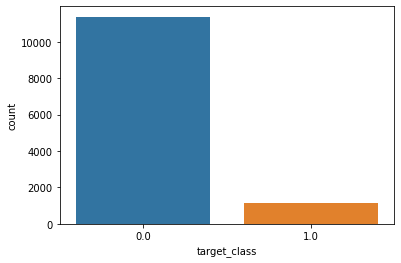

In [37]:
# Verificando balanceamento das classes
print(ps_df_train.target_class.value_counts())
ax = sns.countplot(x="target_class", data=ps_df_train)

In [38]:
# Preparando o train test split
X=ps_df_train.drop("target_class",axis=1)
y=ps_df_train["target_class"]


In [6]:
# Aplicando o SMOTE para balanceamento das classes
smt = SMOTE()
X, y = smt.fit_resample(X, y)

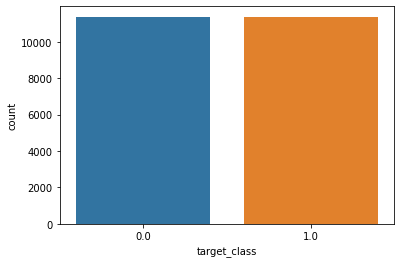

In [7]:
# Verificando balanceamento após SMOTE
ax = sns.countplot(x=y)

In [39]:
# Aplicando o train test split com 80% da base para treinamento
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 18, test_size = 0.2, stratify=y)


In [9]:
# Aplicando standard scaler no modelo
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.fit_transform(val_X)

In [34]:
# RANDOM FOREST REGRESSOR
# Método que calcula acurácia do RANDOM FOREST REGRESSOR recebendo um n_estimators
def calculateAccuracyRF(num_estimators):
  
  print("N_Estimator: {}".format(num_estimators)) 
  
  forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=18)
  forest_model.fit(train_X, train_y)

  y_pred_train = forest_model.predict(val_X)

  fm_score = forest_model.score(val_X, val_y)

  print(fm_score)

  acuracia = accuracy_score(val_y, y_pred_train.astype(int), normalize=True, sample_weight=None)

  print("Acurácia do teste: {:.2f}%".format(acuracia * 100))
  print(confusion_matrix(val_y,y_pred_train.astype(int)))
  print(classification_report(val_y,y_pred_train.astype(int)))
  print("----------------------------------------------------")

 

In [35]:
# Verificando que quanto menor o numero de estimators maior a precisao do teste
# Vou usar estimators entre 1 e 20
for n_estimat in [1,5,10,20]:
  calculateAccuracyRF(n_estimat)

N_Estimator: 1
0.5803663003663003
Acurácia do teste: 96.49%
[[2234   41]
 [  47  184]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2275
         1.0       0.82      0.80      0.81       231

    accuracy                           0.96      2506
   macro avg       0.90      0.89      0.89      2506
weighted avg       0.96      0.96      0.96      2506

----------------------------------------------------
N_Estimator: 5
0.7203713619713619
Acurácia do teste: 96.69%
[[2266    9]
 [  74  157]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2275
         1.0       0.95      0.68      0.79       231

    accuracy                           0.97      2506
   macro avg       0.96      0.84      0.89      2506
weighted avg       0.97      0.97      0.96      2506

----------------------------------------------------
N_Estimator: 10
0.7406854478854479
Acurácia do teste: 96.45%
[[226

In [30]:
# Modelo REGRESSÃO LOGÍSTICA
model_reg_log = LogisticRegression(
    multi_class = 'multinomial',
    fit_intercept = False
)
model_reg_log.fit(train_X, train_y)

y_pred_train_reg_log = model_reg_log.predict(val_X)

mrl_score = model_reg_log.score(val_X, val_y)

print(mrl_score)

calculateAccuracy(y_pred_train_reg_log, val_y)

0.9283516483516484
Acurácia do teste: 92.84%
[[2148  127]
 [ 199 2076]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2275
         1.0       0.94      0.91      0.93      2275

    accuracy                           0.93      4550
   macro avg       0.93      0.93      0.93      4550
weighted avg       0.93      0.93      0.93      4550

----------------------------------------------------


In [42]:
# Calcula acurácia de um modelo, dados suas predicoes e validações
def calculateAccuracy(y_pred_train, val_y):
  acuracia = accuracy_score(val_y, y_pred_train.astype(int), normalize=True)

  print("Acurácia do teste: {:.2f}%".format(acuracia * 100))
  print(confusion_matrix(val_y,y_pred_train.astype(int)))
  print(classification_report(val_y,y_pred_train.astype(int)))
  print("----------------------------------------------------")


In [43]:
# Modelo de ÁRVORE DE DECISÃO
decision_tree_model = DecisionTreeRegressor(
    random_state = 10
)

decision_tree_model.fit(train_X, train_y)

y_pred_train_dec_tree = decision_tree_model.predict(val_X)

dtm_score = decision_tree_model.score(val_X, val_y)

print(dtm_score)

calculateAccuracy(y_pred_train_dec_tree, val_y)

0.5660606060606059
Acurácia do teste: 96.37%
[[2225   50]
 [  41  190]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2275
         1.0       0.79      0.82      0.81       231

    accuracy                           0.96      2506
   macro avg       0.89      0.90      0.89      2506
weighted avg       0.96      0.96      0.96      2506

----------------------------------------------------


In [48]:
# Modelo de REGRESSÃO LINEAR

linear_regression_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression(normalize=True))#LinearRegression()

linear_regression_model.fit(train_X, train_y)

y_pred_train_lin_reg = linear_regression_model.predict(val_X)

lrm_score = linear_regression_model.score(val_X, val_y)

print(lrm_score)

calculateAccuracy(y_pred_train_lin_reg, val_y)

0.5345116184967647
Acurácia do teste: 90.78%
[[2275    0]
 [ 231    0]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      2275
         1.0       0.00      0.00      0.00       231

    accuracy                           0.91      2506
   macro avg       0.45      0.50      0.48      2506
weighted avg       0.82      0.91      0.86      2506

----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packag